In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from scipy.stats import boxcox
import time
import sys

sns.set(rc={'figure.figsize':(15,15)})

In [2]:
# Use the below if on google collab

# from google.colab import files
# import io

# uploaded = files.upload()

# dataset = pd.read_csv(io.BytesIO(uploaded['bank_et2.csv']))
# Dataset is now stored in a Pandas Dataframe

dataset = pd.read_csv("bank_et2.csv", index_col=0)

In [3]:
dataset.head()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
dataset.tail()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [5]:
dataset.describe(include='all')

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,1988.000000,1990,2000,1896,2000,2000.000000,2000.000000,2000.000000,2000,2000,1809,2000.000000,2000,2000.000000,2000.000000,2000.000000,2000.000000,1546,2000
unique,NaN,11,3,3,2,NaN,NaN,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,management,married,secondary,no,NaN,NaN,NaN,no,no,cellular,NaN,feb,NaN,NaN,NaN,NaN,failure,yes
freq,NaN,461,1111,995,1985,NaN,NaN,NaN,1037,1750,1663,NaN,404,NaN,NaN,NaN,NaN,955,1000
mean,41.753018,NaN,NaN,NaN,NaN,1413.663500,0.241951,0.485030,NaN,NaN,NaN,13.851500,NaN,292.020500,1.909500,167.896000,2.561500,NaN,NaN
std,12.724358,NaN,NaN,NaN,NaN,3131.224213,0.821604,1.075543,NaN,NaN,NaN,9.712189,NaN,221.557295,1.378862,131.754126,3.400735,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-980.000000,-2.632068,-2.851405,NaN,NaN,NaN,1.000000,NaN,7.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,201.500000,-0.308018,-0.274181,NaN,NaN,NaN,5.000000,NaN,146.000000,1.000000,75.750000,1.000000,NaN,NaN
50%,38.000000,NaN,NaN,NaN,NaN,551.000000,0.224099,0.487082,NaN,NaN,NaN,12.000000,NaN,236.000000,1.000000,182.000000,2.000000,NaN,NaN
75%,50.000000,NaN,NaN,NaN,NaN,1644.500000,0.806315,1.211896,NaN,NaN,NaN,23.000000,NaN,379.000000,2.000000,251.000000,3.000000,NaN,NaN


In [6]:
sns.pairplot

<function seaborn.axisgrid.pairplot>

In [7]:
print(dataset.isnull().sum())
print(dataset['job'].unique())
print(dataset['education'].unique())
print(dataset['contact'].unique())
print(dataset['poutcome'].unique())

age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64
['technician' 'retired' 'blue-collar' 'self-employed' 'services'
 'management' 'admin.' 'unemployed' 'student' 'entrepreneur' 'housemaid'
 nan]
['tertiary' 'secondary' nan 'primary']
['cellular' 'telephone' nan]
['failure' 'other' 'success' nan]


As we can see the following fields contain null values:
[age, job, education, contact, poutcome]
We will now explore these fields to explore how to deal with these missing values


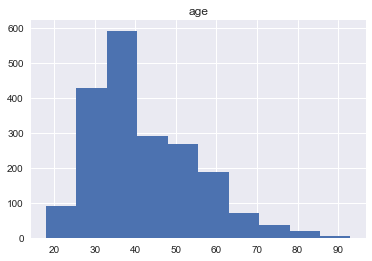

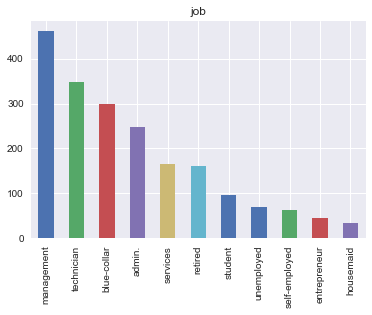

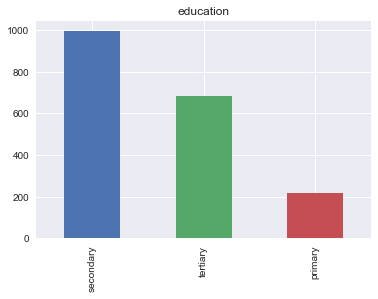

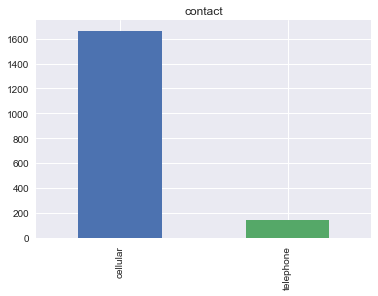

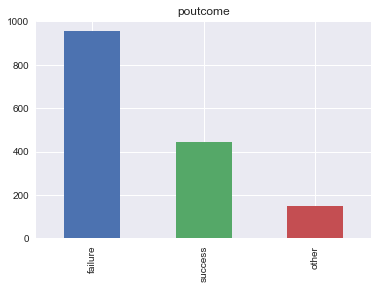

In [8]:
for col in ['age', 'job', 'education', 'contact', 'poutcome']:
    plt.title(col)
    if dataset[col].dtypes == 'object':
        dataset[col].value_counts().plot(kind='bar')
    else:
        dataset[col].hist()
    plt.show()


    

In [9]:
print(dataset[dataset['poutcome'].isnull()]['pdays'].value_counts())
print(dataset[dataset['pdays']==-1]['poutcome'].values)

-1    454
Name: pdays, dtype: int64
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan na

As we can see poutcome null values are all records with -1 for previous calls therefore we will input a new value for these 'no_previous'

We will drop null values for age and job as they are so few samples it is unlikely to effect the final learning outcome

For contact we will inpute the values using a logistic regression and we will use a decision tree classifier to predict our missing values for education

In [10]:
df = dataset.dropna(subset=['age','job'])
df[['poutcome']] = df[['poutcome']].fillna(value='no_previous')
print(df.isnull().sum())

age               0
job               0
marital           0
education        99
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         190
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
subscribed        0
dtype: int64


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [11]:
cat_columns = df.select_dtypes(['object']).columns

for col in cat_columns:
    df[col] = df[col].astype('category')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
category_columns = df[cat_columns]
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [13]:
df.head(20)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,9,2,2,0,392,1.300134,0.473895,1,0,0,1,0,957,2,131,2,0,0
1,39.0,9,0,1,0,688,-0.193701,0.237021,1,1,0,1,0,233,2,133,1,0,0
2,59.0,5,1,1,0,1035,1.334266,0.121981,1,1,0,1,0,126,2,239,1,0,0
3,47.0,1,1,1,0,398,0.362286,1.251328,1,1,0,1,0,274,1,238,2,0,0
4,54.0,5,1,1,0,1004,0.072075,-0.533738,1,0,0,1,0,479,1,307,1,0,0
5,46.0,6,0,2,0,926,0.233619,0.922197,1,0,0,1,0,463,1,133,3,0,0
6,34.0,1,1,1,0,1924,0.022648,0.724227,1,1,0,1,0,161,2,253,1,0,0
7,45.0,7,0,1,0,396,-0.724889,-0.998605,1,1,0,1,0,251,4,329,4,0,0
8,58.0,4,0,2,0,315,0.502131,-0.045391,1,0,0,1,0,121,2,135,2,0,0
9,49.0,4,0,2,0,20727,1.331625,-0.420830,0,0,0,1,0,285,3,132,2,0,0


In [14]:
df_edu = df[df['education'] != -1]
df_contact = df[df['contact'] != -1]

X_edu = df_edu.drop('education', axis=1).values
y_edu = df_edu['education'].values

X_cont = df_edu.drop('contact', axis=1).values
y_cont = df_edu['contact'].values

X_train, X_test, y_train, y_test = train_test_split(X_edu, y_edu, test_size=0.2)

edu_clf = DecisionTreeClassifier(max_depth=5)
edu_clf.fit(X_train, y_train)
print(edu_clf.score(X_train, y_train))
print(edu_clf.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(X_cont, y_cont, test_size=0.2)
cont_clf = LogisticRegression()
cont_clf.fit(X_train, y_train)
print(cont_clf.score(X_train, y_train))
print(cont_clf.score(X_test, y_test))

0.7631403858948769
0.723404255319149
0.9135063206919495
0.925531914893617


In [15]:
edu_actual = df['education'].values
edu_predictions = edu_clf.predict(df.drop('education', axis=1).values)

con_actual = df['education'].values
con_predictions = cont_clf.predict(df.drop('contact', axis=1).values)

edu_values = [edu_actual[i] if edu_actual[i] != -1 else edu_predictions[i] for i in range(len(edu_predictions))]
con_values = [con_actual[i] if con_actual[i] != -1 else con_predictions[i] for i in range(len(con_predictions))]

In [16]:
df['education'] = edu_values
df['contact'] = con_values

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
print(df.isnull().sum())

age             0
job             0
marital         0
education       0
default         0
balance         0
ratio_bal_ln    0
ratio_ln_inc    0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscribed      0
dtype: int64


In [18]:
df.describe()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000
mean,41.718402,4.659252,1.228008,1.244186,0.007078,1416.627907,0.246626,0.485655,0.482811,0.125379,1.180991,13.852882,5.018200,291.335187,1.906471,167.739130,2.566229,1.040445,0.500506
std,12.718861,3.222042,0.627384,0.637339,0.083853,3146.990010,0.819581,1.076891,0.499831,0.331232,0.690716,9.707669,3.254921,220.787253,1.366130,131.483473,3.413637,1.198288,0.500126
min,18.000000,0.000000,0.000000,0.000000,0.000000,-980.000000,-2.632068,-2.851405,0.000000,0.000000,-1.000000,1.000000,0.000000,7.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,199.000000,-0.306122,-0.276613,0.000000,0.000000,1.000000,5.000000,3.000000,146.000000,1.000000,75.000000,1.000000,0.000000,0.000000
50%,38.000000,4.000000,1.000000,1.000000,0.000000,549.000000,0.224593,0.494409,0.000000,0.000000,1.000000,12.000000,4.000000,235.500000,1.000000,182.000000,2.000000,1.000000,1.000000
75%,50.000000,8.000000,2.000000,2.000000,0.000000,1634.750000,0.811690,1.213003,1.000000,0.000000,2.000000,23.000000,8.000000,374.000000,2.000000,251.000000,3.000000,2.000000,1.000000
max,93.000000,10.000000,2.000000,2.000000,1.000000,81204.000000,2.961979,4.046914,1.000000,1.000000,2.000000,31.000000,11.000000,1823.000000,11.000000,854.000000,55.000000,3.000000,1.000000


### Outliers

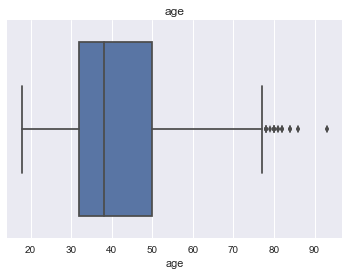

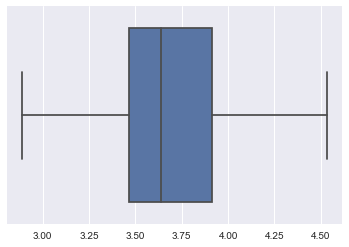

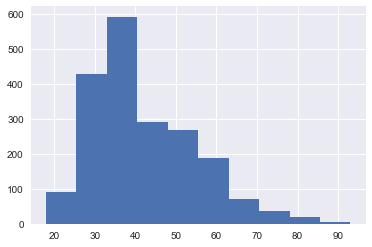

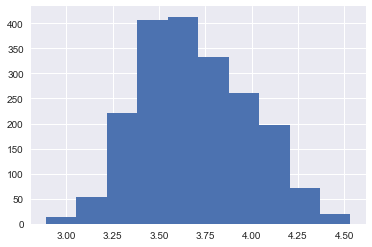

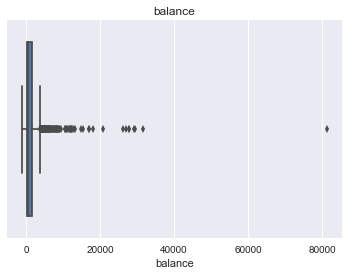

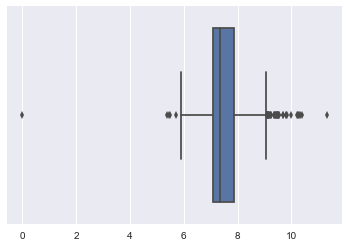

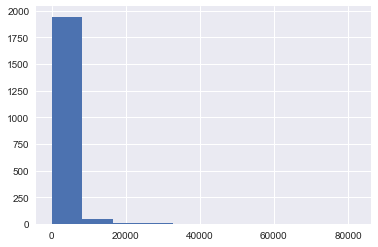

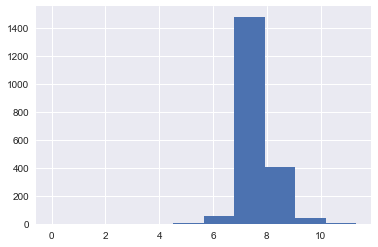

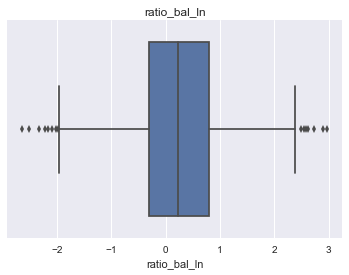

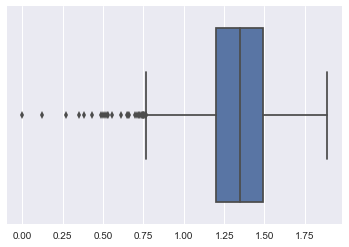

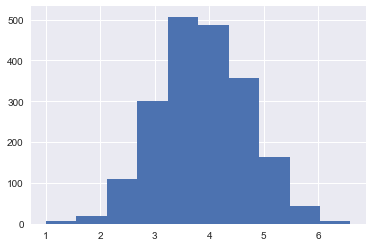

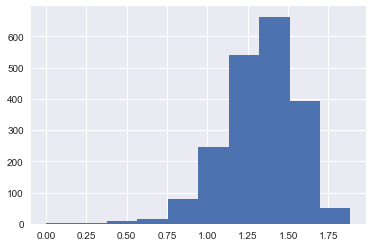

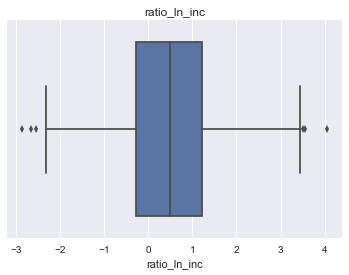

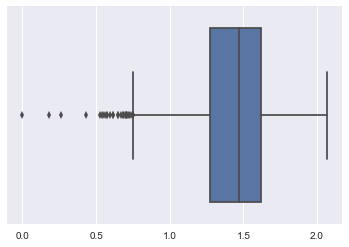

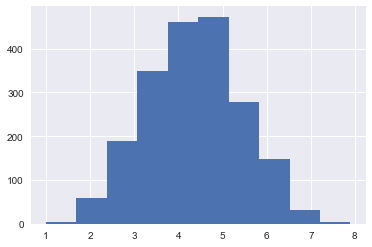

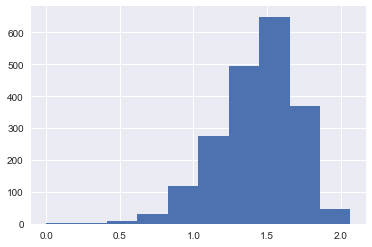

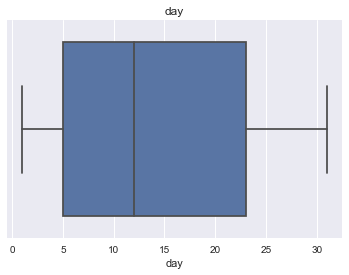

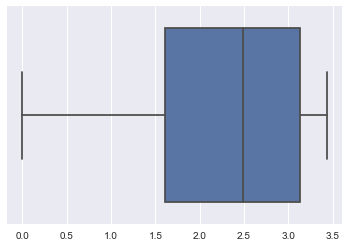

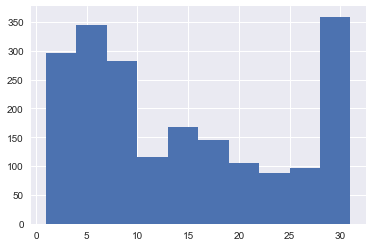

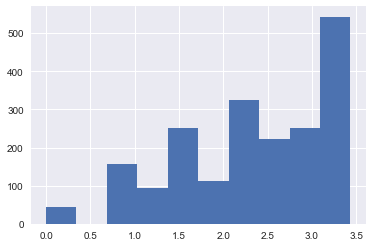

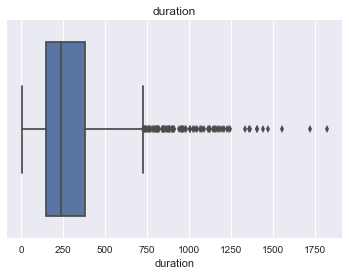

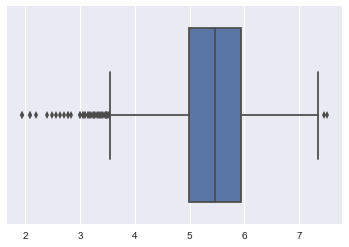

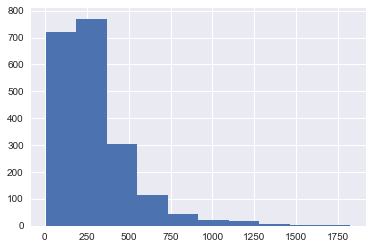

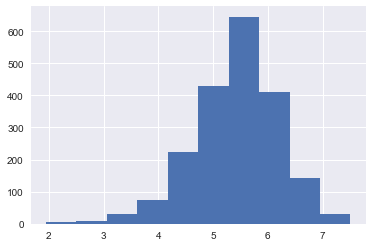

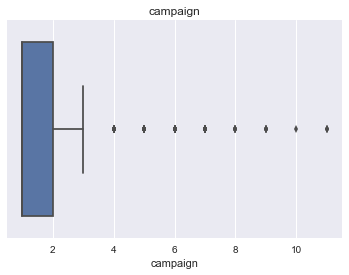

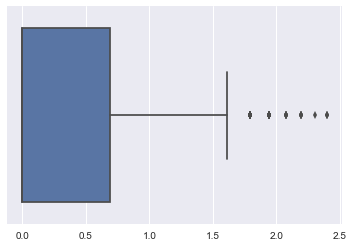

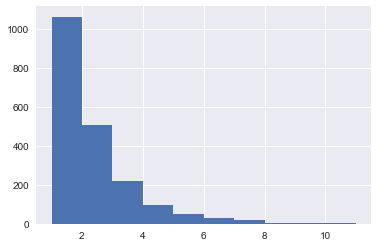

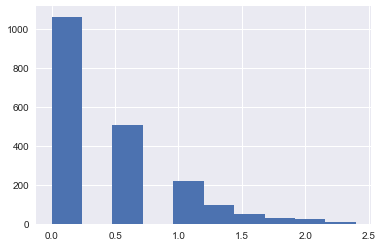

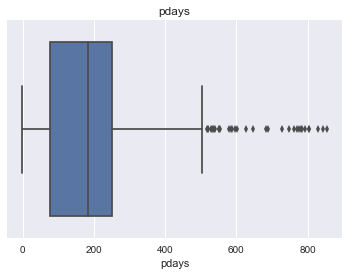

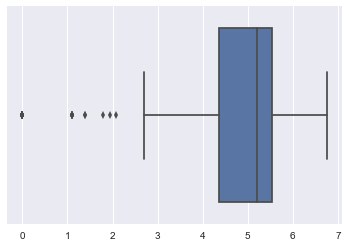

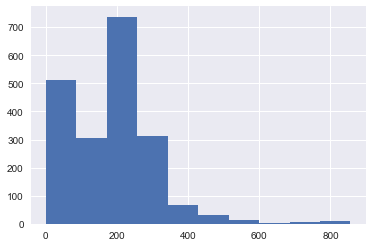

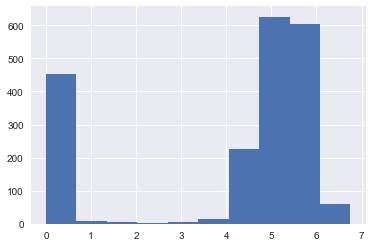

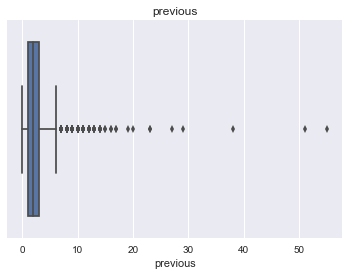

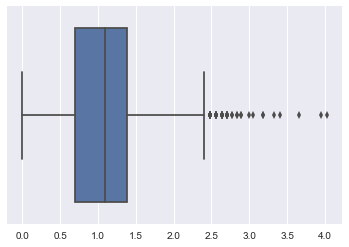

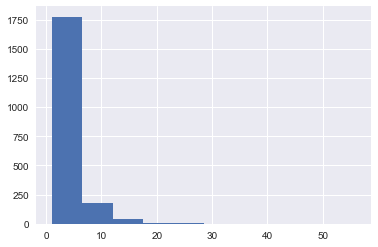

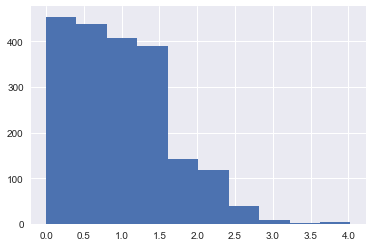

In [19]:
for col in dataset.select_dtypes('number').columns:
    plt.title(col)
    
    sns.boxplot(dataset[col].dropna())
    plt.show()
    if dataset[col].min() <= 0:
        data = dataset[col] + abs(dataset[col].min()) + 1
    else:
        data = dataset[col]
    sns.boxplot(boxcox(data.dropna(), 0))
    plt.show()
    plt.hist(data.dropna())
    plt.show()
    plt.hist(boxcox(data.dropna(), 0))
    plt.show()


I have examined the distribution of values for all numeric columns,
I noted that application of boxcox transformation removed many outliers and resulted in a more normal distribution for: age, balance and  duration

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/morestats.py:1030: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


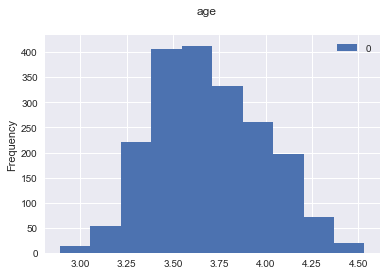

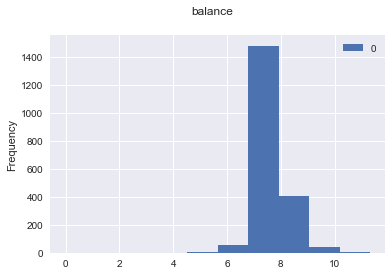

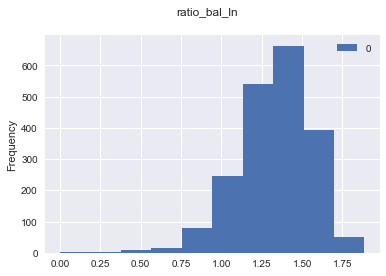

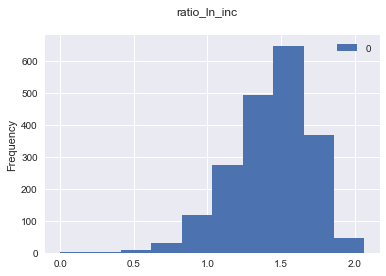

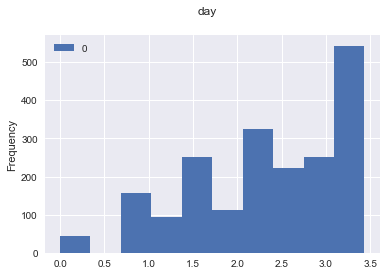

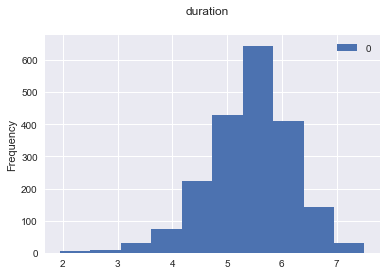

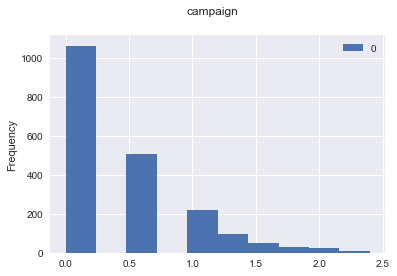

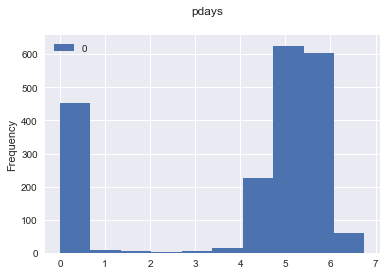

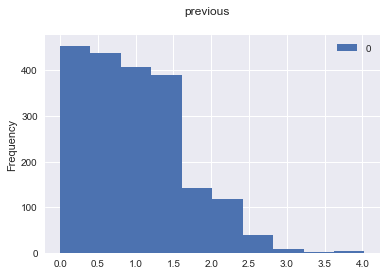

In [20]:
from scipy import stats

for col in dataset.select_dtypes('number').columns: 
    if dataset[col].min() <= 0:
        data = dataset[col] + abs(dataset[col].min()) + 1
    else:
        data = dataset[col]
    pd.DataFrame(boxcox(data, 0)).dropna().plot(kind='hist',subplots=True,sharex=True,sharey=True,title=col)



In [21]:
### apply boxcox
for col in ['age','balance','duration']:
    if df[col].min() <= 0:
        data = df[col] + abs(df[col].min()) + 1
    else:
        data = df[col]
    df[col] = boxcox(data, 0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [22]:
df.describe()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000
mean,3.687181,4.659252,1.228008,1.244186,0.007078,7.510224,0.246626,0.485655,0.482811,0.125379,1.180991,13.852882,5.018200,5.408887,1.906471,167.739130,2.566229,1.040445,0.500506
std,0.293437,3.222042,0.627384,0.637339,0.083853,0.653871,0.819581,1.076891,0.499831,0.331232,0.690716,9.707669,3.254921,0.774510,1.366130,131.483473,3.413637,1.198288,0.500126
min,2.890372,0.000000,0.000000,0.000000,0.000000,0.000000,-2.632068,-2.851405,0.000000,0.000000,-1.000000,1.000000,0.000000,1.945910,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,3.465736,1.000000,1.000000,1.000000,0.000000,7.073270,-0.306122,-0.276613,0.000000,0.000000,1.000000,5.000000,3.000000,4.983607,1.000000,75.000000,1.000000,0.000000,0.000000
50%,3.637586,4.000000,1.000000,1.000000,0.000000,7.333023,0.224593,0.494409,0.000000,0.000000,1.000000,12.000000,4.000000,5.461709,1.000000,182.000000,2.000000,1.000000,1.000000
75%,3.912023,8.000000,2.000000,2.000000,0.000000,7.869306,0.811690,1.213003,1.000000,0.000000,2.000000,23.000000,8.000000,5.924256,2.000000,251.000000,3.000000,2.000000,1.000000
max,4.532599,10.000000,2.000000,2.000000,1.000000,11.316728,2.961979,4.046914,1.000000,1.000000,2.000000,31.000000,11.000000,7.508239,11.000000,854.000000,55.000000,3.000000,1.000000


### Task 3

We will now create a feature which will be used to track the season. I will use the month attribute to extract the season

In [23]:
print(dataset.columns)
dataset.month.unique()
dataset[dataset['day'] == 31]

Index(['age', 'job', 'marital', 'education', 'default', 'balance',
       'ratio_bal_ln', 'ratio_ln_inc', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'subscribed'],
      dtype='object')


,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1148,36.0,admin.,single,tertiary,no,364,-0.009689,-0.094002,no,yes,cellular,31,aug,185,1,123,1,failure,yes
1149,61.0,housemaid,married,primary,no,211,0.293036,0.432411,no,no,cellular,31,aug,443,2,186,3,failure,yes
1163,52.0,self-employed,married,tertiary,no,4012,-0.806988,1.679324,no,no,cellular,31,aug,634,3,92,5,other,yes
1164,60.0,management,married,tertiary,no,474,-0.780390,0.550377,no,no,cellular,31,aug,415,5,186,3,other,yes
1259,57.0,retired,married,tertiary,no,1269,0.282603,2.191308,no,no,cellular,31,aug,1120,1,-1,0,NaN,yes
1260,63.0,admin.,married,secondary,no,0,-0.528021,1.333035,yes,no,cellular,31,aug,253,5,-1,0,NaN,yes
1261,34.0,admin.,single,tertiary,no,625,0.642129,0.175704,no,yes,NaN,31,aug,34,1,-1,0,NaN,yes
1550,27.0,student,single,secondary,no,6036,1.070740,4.046914,no,no,cellular,31,mar,175,1,181,1,failure,yes
1560,80.0,retired,divorced,primary,no,235,0.026581,0.960954,no,no,cellular,31,mar,577,1,223,3,other,yes
1584,47.0,management,married,tertiary,no,288,-0.139072,1.831393,no,no,cellular,31,mar,193,1,181,1,success,yes


In [24]:
def getSeason(month):
    if month in ['jan', 'feb', 'mar']:
        season = 0
    elif month in ['apr', 'may', 'jun']:
        season = 1
    elif month in ['jul', 'aug', 'sep']:
        season = 2
    else:
        season = 3
    return season

dataset['season'] = dataset['month'].apply(lambda x: getSeason(x))

df['season'] = dataset['season']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Task 4


In [25]:
classifier = LogisticRegression()
X = df.drop('subscribed', axis=1)
y = df['subscribed'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.946969696969697

In [26]:
def train_model(classifier, X, y):
    repeats=100
    #use 20% of data for training
    tr_size = 0.8
    error_in=[]
    error_out=[]
    for i in range(repeats):
        sys.stdout.write("\r%d%%" % i)
        sys.stdout.flush()
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=tr_size, test_size=0.2)
        classifier.fit(X_train, y_train)
        eout = classifier.score(X_test, y_test)
        ein = classifier.score(X_train, y_train)
        error_in.append(ein)
        error_out.append(eout)
    N=len(X_train)
    return error_in, error_out, N

In [27]:
error_in, error_out, N = train_model(classifier, X, y)

99%

Error does not exceed Hoeffding
Error does not exceed VC


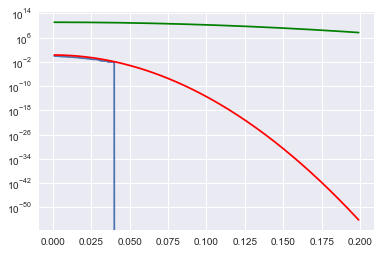

In [28]:
error_diff = abs(np.array(error_in)-np.array(error_out))
epsilons = np.arange(0.001,0.20,0.001)
prob_epsilon=[]
for e in epsilons:
        prob_epsilon.append(len([1 for i in error_diff if i > e])/len(error_diff))
plt.plot(epsilons, prob_epsilon)

hoef = [2*math.exp(-2*N*e**2) for e in epsilons]
vc = [4*((2*N)**3+1)*math.exp(-(N/8)*e**2) for e in epsilons]

print("Error exceeds Hoeffding" if max(np.array(prob_epsilon)-np.array(hoef))>0 else "Error does not exceed Hoeffding")
print("Error exceeds VC" if max(np.array(prob_epsilon)-np.array(vc))>0 else "Error does not exceed VC")
plt.plot(epsilons, hoef,'r')
plt.plot(epsilons, vc, 'g')
plt.yscale('log')
plt.show()

    

We can See that our classifier does not exceed the Hoeffding or the VC bound

### Task 5

First we will declare our method to plot the learning curve based on example found [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
)

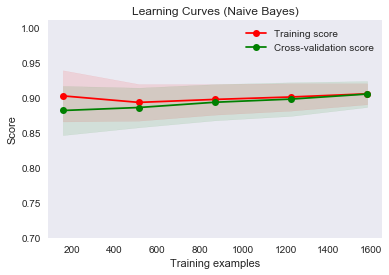

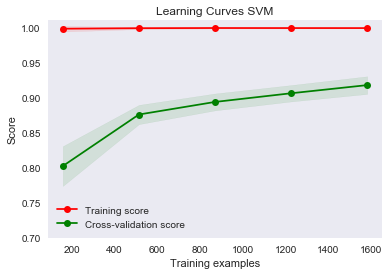

In [30]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves SVM"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC()
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

As we can see our Naive Bayes classifier having low complexity we can see that it has:
- a final higher testing error (roughly ~.1 vs. 0 on our SVC)
- started with a higher error which dipped and converged quite quickly
- Needs much less data to converge than a complex model

As we can see from our SVC model having high complexity we can see that it has:
- a low in sample error (0%)
- A very high out of sample error with a huge difference between itself and the in sample error
- Needs more data to converge with a difference of .1 between the in and out of sample errors
